### Unsupervised Learning - Clustering

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(data={'x0':[7,5,7,3,4,1,0,2,8,6,5,3],
                       'x1':[5,7,7,3,6,4,0,2,7,8,5,7]})
df

,x0,x1
0,7,5
1,5,7
2,7,7
3,3,3
4,4,6
5,1,4
6,0,0
7,2,2
8,8,7
9,6,8


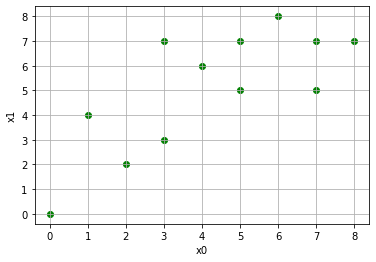

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df['x0'],df['x1'],color='g')
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()


### Making 2 Clusters , Choosing our centroids

In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,init = 'random')

In [5]:
y_kmeans = kmeans.fit(df)
print(y_kmeans)

KMeans(init='random', n_clusters=2)


In [6]:
y_kmeans.labels_

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0])

In [7]:
y_kmeans = kmeans.fit_predict(df)
print(y_kmeans)

[1 1 1 0 1 0 0 0 1 1 1 1]


In [8]:
kmeans.labels_

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1])

In [9]:
kmeans.inertia_

41.625

In [10]:
kmeans.n_iter_

2

In [11]:
c = kmeans.cluster_centers_
print(c) #centroid coordinates

[[1.5   2.25 ]
 [5.625 6.5  ]]


In [12]:
c[:,1]

array([2.25, 6.5 ])

In [13]:
print(kmeans.predict([[0,0]]))
print(kmeans.predict([[7,6]]))
print(kmeans.predict([[1,1],[4,4],[6,6]]))

[0]
[1]
[0 1 1]


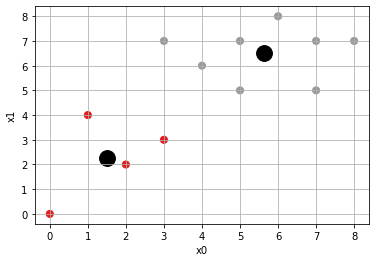

In [14]:
plt.scatter(df['x0'],df['x1'], c = y_kmeans, s= 50,cmap = 'Set1')
plt.scatter(c[:,0],c[:,1], c = 'k',s = 250)
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()

## Distance between centroid and otehr cluster points

In [21]:
import numpy as np
c1_centroid = c[0]
c2_centroid = c[1]

cluster1_points = df[y_kmeans==0]
cluster2_points = df[y_kmeans==1]

c1_distances = cluster1_points.apply(lambda x:
                    np.sqrt((x[0]-c1_centroid[0])**2+
                           (x[1]-c1_centroid[0])**2),axis=1)
c2_distances = cluster2_points.apply(lambda x:
                    np.sqrt((x[0]-c2_centroid[0])**2+
                           (x[1]-c2_centroid[0])**2),axis=1)

print(c1_distances)
print(c2_distances)
print(c1_distances.mean())
print(c2_distances.mean())

3    2.121320
5    2.549510
6    2.121320
7    0.707107
dtype: float64
0     1.510381
1     1.510381
2     1.944544
4     1.667708
8     2.744312
9     2.404423
10    0.883883
11    2.963317
dtype: float64
1.8748143062755562
1.9536186664580606


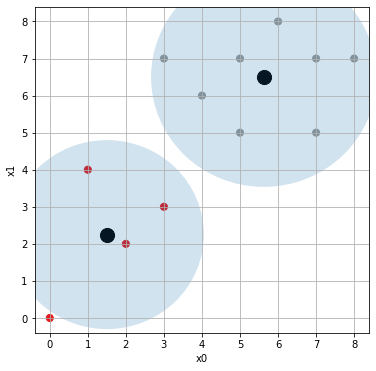

In [20]:
from matplotlib.patches import Circle
fig, ax= plt.subplots(figsize=(6,6))


plt.scatter(df['x0'],df['x1'],c= y_kmeans,s=50,cmap ='Set1')
plt.scatter(c[:,0],c[:,1],c='k',s=200)
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid()

circle1= plt.Circle(c1_centroid,c1_distances.max(),alpha=0.2)
circle2= plt.Circle(c2_centroid,c2_distances.max(),alpha=0.2)

ax.add_artist(circle1)
ax.add_artist(circle2)